In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
chunks = pd.read_csv("data/cms_data.csv", chunksize=100000)
data = pd.concat(chunks, ignore_index=True)
print(data.info())
print(data.head())


FileNotFoundError: [Errno 2] No such file or directory: 'data/cms_data.csv'

In [4]:
import os
print(os.getcwd())

/


In [7]:
data = pd.read_csv("/Users/katieadams/Desktop/cmsproject/data/cms_data.csv")

In [9]:
import os
print(os.listdir())

['home', 'usr', '.resolve', 'bin', 'sbin', '.file', 'etc', 'var', 'Library', 'System', '.VolumeIcon.icns', 'private', '.vol', 'Users', 'Applications', 'opt', 'dev', 'Volumes', '.nofollow', 'tmp', 'cores']


In [8]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /


In [10]:
import os
os.chdir("/Users/katieadams/Desktop/cmsproject")
print("New Working Directory:", os.getcwd())

New Working Directory: /Users/katieadams/Desktop/cmsproject


In [11]:
import pandas as pd
data = pd.read_csv("data/cms_data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14502413 entries, 0 to 14502412
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   HCPCS_CD                    object 
 1   HCPCS_INITIAL_MODIFIER_CD   object 
 2   PROVIDER_SPEC_CD            object 
 3   CARRIER_NUM                 int64  
 4   PRICING_LOCALITY_CD         object 
 5   TYPE_OF_SERVICE_CD          object 
 6   PLACE_OF_SERVICE_CD         int64  
 7   HCPCS_SECOND_MODIFIER_CD    object 
 8   PSPS_SUBMITTED_SERVICE_CNT  object 
 9   PSPS_SUBMITTED_CHARGE_AMT   object 
 10  PSPS_ALLOWED_CHARGE_AMT     object 
 11  PSPS_DENIED_SERVICES_CNT    object 
 12  PSPS_DENIED_CHARGE_AMT      object 
 13  PSPS_ASSIGNED_SERVICES_CNT  object 
 14  PSPS_NCH_PAYMENT_AMT        float64
 15  PSPS_HCPCS_ASC_IND_CD       object 
 16  PSPS_ERROR_IND_CD           int64  
 17  HCPCS_BETOS_CD              object 
dtypes: float64(1), int64(3), object(14)
memory usage: 1.9+ GB
No

In [ ]:
print(data.head())


  HCPCS_CD HCPCS_INITIAL_MODIFIER_CD PROVIDER_SPEC_CD  CARRIER_NUM  \
0    A6010                        A6               23        10112   
1    70551                        26               94         8102   
2    64493                        50               05         5302   
3    97530                        GO               67        10212   
4    73000                        LT               50        14212   

  PRICING_LOCALITY_CD TYPE_OF_SERVICE_CD  PLACE_OF_SERVICE_CD  \
0                  00                  S                   12   
1                  00                  4                   21   
2                  99                  2                   22   
3                  01                  1                   13   
4                  99                  4                   11   

  HCPCS_SECOND_MODIFIER_CD PSPS_SUBMITTED_SERVICE_CNT  \
0                      NaN                        180   
1                       51                         24   
2                

In [14]:
print(data.columns)



Index(['HCPCS_CD', 'HCPCS_INITIAL_MODIFIER_CD', 'PROVIDER_SPEC_CD',
       'CARRIER_NUM', 'PRICING_LOCALITY_CD', 'TYPE_OF_SERVICE_CD',
       'PLACE_OF_SERVICE_CD', 'HCPCS_SECOND_MODIFIER_CD',
       'PSPS_SUBMITTED_SERVICE_CNT', 'PSPS_SUBMITTED_CHARGE_AMT',
       'PSPS_ALLOWED_CHARGE_AMT', 'PSPS_DENIED_SERVICES_CNT',
       'PSPS_DENIED_CHARGE_AMT', 'PSPS_ASSIGNED_SERVICES_CNT',
       'PSPS_NCH_PAYMENT_AMT', 'PSPS_HCPCS_ASC_IND_CD', 'PSPS_ERROR_IND_CD',
       'HCPCS_BETOS_CD'],
      dtype='object')


In [16]:
data.dropna(subset=['HCPCS_CD', 'TYPE_OF_SERVICE_CD', 'PSPS_SUBMITTED_CHARGE_AMT', 'PSPS_ALLOWED_CHARGE_AMT'], inplace=True)

In [17]:
data.columns = data.columns.str.strip().str.lower()

In [18]:
print(data.columns)

Index(['hcpcs_cd', 'hcpcs_initial_modifier_cd', 'provider_spec_cd',
       'carrier_num', 'pricing_locality_cd', 'type_of_service_cd',
       'place_of_service_cd', 'hcpcs_second_modifier_cd',
       'psps_submitted_service_cnt', 'psps_submitted_charge_amt',
       'psps_allowed_charge_amt', 'psps_denied_services_cnt',
       'psps_denied_charge_amt', 'psps_assigned_services_cnt',
       'psps_nch_payment_amt', 'psps_hcpcs_asc_ind_cd', 'psps_error_ind_cd',
       'hcpcs_betos_cd'],
      dtype='object')


In [19]:
print(data.info())
# Display sample data
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14502413 entries, 0 to 14502412
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   hcpcs_cd                    object 
 1   hcpcs_initial_modifier_cd   object 
 2   provider_spec_cd            object 
 3   carrier_num                 int64  
 4   pricing_locality_cd         object 
 5   type_of_service_cd          object 
 6   place_of_service_cd         int64  
 7   hcpcs_second_modifier_cd    object 
 8   psps_submitted_service_cnt  object 
 9   psps_submitted_charge_amt   object 
 10  psps_allowed_charge_amt     object 
 11  psps_denied_services_cnt    object 
 12  psps_denied_charge_amt      object 
 13  psps_assigned_services_cnt  object 
 14  psps_nch_payment_amt        float64
 15  psps_hcpcs_asc_ind_cd       object 
 16  psps_error_ind_cd           int64  
 17  hcpcs_betos_cd              object 
dtypes: float64(1), int64(3), object(14)
memory usage: 1.9+ GB
No

In [20]:
# Filter dataset to focus on key columns
columns_to_keep = [
    'provider_spec_cd', 'hcpcs_cd', 'place_of_service_cd', 
    'psps_submitted_service_cnt', 'psps_assigned_services_cnt', 
    'psps_submitted_charge_amt', 'psps_allowed_charge_amt', 
    'psps_nch_payment_amt', 'psps_denied_services_cnt',
    'pricing_locality_cd', 'carrier_num'
]

# Select only these columns
focused_data = data[columns_to_keep]

# Clean column names for consistency
focused_data.columns = focused_data.columns.str.strip().str.upper()

# Display summary
print(focused_data.info())
print(focused_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14502413 entries, 0 to 14502412
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   PROVIDER_SPEC_CD            object 
 1   HCPCS_CD                    object 
 2   PLACE_OF_SERVICE_CD         int64  
 3   PSPS_SUBMITTED_SERVICE_CNT  object 
 4   PSPS_ASSIGNED_SERVICES_CNT  object 
 5   PSPS_SUBMITTED_CHARGE_AMT   object 
 6   PSPS_ALLOWED_CHARGE_AMT     object 
 7   PSPS_NCH_PAYMENT_AMT        float64
 8   PSPS_DENIED_SERVICES_CNT    object 
 9   PRICING_LOCALITY_CD         object 
 10  CARRIER_NUM                 int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.2+ GB
None
  PROVIDER_SPEC_CD HCPCS_CD  PLACE_OF_SERVICE_CD PSPS_SUBMITTED_SERVICE_CNT  \
0               23    A6010                   12                        180   
1               94    70551                   21                         24   
2               05    64493                   22

In [21]:
print(data.isnull().sum())

hcpcs_cd                            0
hcpcs_initial_modifier_cd     3119328
provider_spec_cd                    0
carrier_num                         0
pricing_locality_cd               415
type_of_service_cd                  0
place_of_service_cd                 0
hcpcs_second_modifier_cd      8834926
psps_submitted_service_cnt          0
psps_submitted_charge_amt           0
psps_allowed_charge_amt             0
psps_denied_services_cnt            0
psps_denied_charge_amt              0
psps_assigned_services_cnt          0
psps_nch_payment_amt                0
psps_hcpcs_asc_ind_cd            4056
psps_error_ind_cd                   0
hcpcs_betos_cd                   4056
dtype: int64


In [22]:
# Drop unnecessary columns
data.drop(['hcpcs_initial_modifier_cd', 'hcpcs_second_modifier_cd'], axis=1, inplace=True)

# Drop rows with missing locality codes
data.dropna(subset=['pricing_locality_cd'], inplace=True)

# Fill minor missing categories
cols_to_fill = ['psps_hcpcs_asc_ind_cd', 'psps_error_ind_cd', 'hcpcs_betos_cd']
data[cols_to_fill] = data[cols_to_fill].fillna('UNKNOWN')

# Convert financial fields to numeric and fill NaN with median
financial_cols = [
    'psps_submitted_charge_amt', 
    'psps_allowed_charge_amt', 
    'psps_nch_payment_amt'
]

for col in financial_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

# Display final data summary
print(data.info())

/var/folders/rr/_zns81k53xq8pyhsf0c2ywqm0000gn/T/ipykernel_20539/3398354820.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/var/folders/rr/_zns81k53xq8pyhsf0c2ywqm0000gn/T/ipykernel_20539/3398354820.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

<class 'pandas.core.frame.DataFrame'>
Index: 14501998 entries, 0 to 14502412
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   hcpcs_cd                    object 
 1   provider_spec_cd            object 
 2   carrier_num                 int64  
 3   pricing_locality_cd         object 
 4   type_of_service_cd          object 
 5   place_of_service_cd         int64  
 6   psps_submitted_service_cnt  object 
 7   psps_submitted_charge_amt   float64
 8   psps_allowed_charge_amt     float64
 9   psps_denied_services_cnt    object 
 10  psps_denied_charge_amt      object 
 11  psps_assigned_services_cnt  object 
 12  psps_nch_payment_amt        float64
 13  psps_hcpcs_asc_ind_cd       object 
 14  psps_error_ind_cd           int64  
 15  hcpcs_betos_cd              object 
dtypes: float64(3), int64(3), object(10)
memory usage: 1.8+ GB
None


/var/folders/rr/_zns81k53xq8pyhsf0c2ywqm0000gn/T/ipykernel_20539/3398354820.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [23]:
print(data.isnull().sum())  # Confirm missing values are handled
print(data.info())          # Confirm correct data types

hcpcs_cd                      0
provider_spec_cd              0
carrier_num                   0
pricing_locality_cd           0
type_of_service_cd            0
place_of_service_cd           0
psps_submitted_service_cnt    0
psps_submitted_charge_amt     0
psps_allowed_charge_amt       0
psps_denied_services_cnt      0
psps_denied_charge_amt        0
psps_assigned_services_cnt    0
psps_nch_payment_amt          0
psps_hcpcs_asc_ind_cd         0
psps_error_ind_cd             0
hcpcs_betos_cd                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14501998 entries, 0 to 14502412
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   hcpcs_cd                    object 
 1   provider_spec_cd            object 
 2   carrier_num                 int64  
 3   pricing_locality_cd         object 
 4   type_of_service_cd          object 
 5   place_of_service_cd         int64  
 6   psps_submitted_service_cnt  obje

In [25]:
# Basic Statistics
print(data.describe())    # Summary of numeric columns

# Check for unique values in key fields
print(data['provider_spec_cd'].value_counts())  # Provider specialties
print(data['place_of_service_cd'].value_counts())  # Service locations
print(data['hcpcs_cd'].value_counts().head(10))  # Top procedure codes

        carrier_num  place_of_service_cd  psps_submitted_charge_amt  \
count  1.450200e+07         1.450200e+07               1.450200e+07   
mean   7.794474e+03         1.898020e+01               4.285334e+04   
std    5.055244e+03         1.021235e+01               7.917756e+05   
min    8.820000e+02         0.000000e+00               0.000000e+00   
25%    3.402000e+03         1.100000e+01               9.933000e+03   
50%    7.202000e+03         2.100000e+01               9.933000e+03   
75%    1.230200e+04         2.200000e+01               9.933000e+03   
max    1.900300e+04         9.900000e+01               1.086192e+09   

       psps_allowed_charge_amt  psps_nch_payment_amt  psps_error_ind_cd  
count             1.450200e+07          1.450200e+07       1.450200e+07  
mean              1.260928e+04          8.665432e+03       1.575783e-03  
std               3.142103e+05          2.626982e+05       7.937663e-02  
min               0.000000e+00          0.000000e+00       0.000

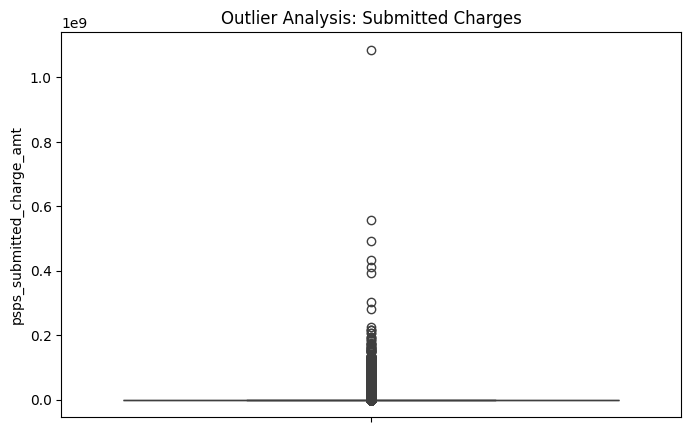

Number of Potential Outlier Records: 1849320
   provider_spec_cd  psps_submitted_charge_amt
0                23                   17051.40
2                05                  153023.50
3                67                  838726.80
5                49                  739756.82
7                05                 6860915.38
9                11                  152966.58
10               02                   36391.98
11               C3                   23848.75
12               11                   30960.00
16               07                   13274.00


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Detection for Submitted Charges
plt.figure(figsize=(8, 5))
sns.boxplot(data['psps_submitted_charge_amt'])
plt.title('Outlier Analysis: Submitted Charges')
plt.show()

# Identifying Outlier Providers
Q1 = data['psps_submitted_charge_amt'].quantile(0.25)
Q3 = data['psps_submitted_charge_amt'].quantile(0.75)
IQR = Q3 - Q1

# Flag records that are extreme outliers
outliers = data[
    (data['psps_submitted_charge_amt'] > (Q3 + 1.5 * IQR))
]

print(f"Number of Potential Outlier Records: {outliers.shape[0]}")
print(outliers[['provider_spec_cd', 'psps_submitted_charge_amt']].head(10))

In [27]:
Q1 = data['psps_submitted_charge_amt'].quantile(0.25)
Q3 = data['psps_submitted_charge_amt'].quantile(0.75)
IQR = Q3 - Q1

# Outlier threshold
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = data[data['psps_submitted_charge_amt'] > upper_bound]

print(f"Number of Potential Outlier Records: {outliers.shape[0]}")
print(outliers[['provider_spec_cd', 'psps_submitted_charge_amt']].head(10))

Number of Potential Outlier Records: 1849320
   provider_spec_cd  psps_submitted_charge_amt
0                23                   17051.40
2                05                  153023.50
3                67                  838726.80
5                49                  739756.82
7                05                 6860915.38
9                11                  152966.58
10               02                   36391.98
11               C3                   23848.75
12               11                   30960.00
16               07                   13274.00


In [28]:
# Group outliers by specialty for insight
outlier_summary = outliers.groupby('provider_spec_cd')['psps_submitted_charge_amt'].sum().sort_values(ascending=False)
print(outlier_summary)

# Compare submitted vs. paid amounts in outliers
outliers[['psps_submitted_charge_amt', 'psps_nch_payment_amt']].describe()

provider_spec_cd
49    3.176689e+10
69    2.765003e+10
30    2.624540e+10
50    2.522257e+10
18    2.467726e+10
          ...     
A7    7.513538e+05
A1    3.534740e+05
D1    7.000700e+04
E6    5.638740e+04
E1    4.340050e+04
Name: psps_submitted_charge_amt, Length: 125, dtype: float64


,psps_submitted_charge_amt,psps_nch_payment_amt
count,1.849320e+06,1.849320e+06
mean,2.747845e+05,6.493224e+04
std,2.203269e+06,7.331555e+05
min,9.933010e+03,0.000000e+00
25%,1.953256e+04,3.090145e+03
50%,4.200000e+04,7.335630e+03
75%,1.215742e+05,2.236110e+04
max,1.086192e+09,2.963783e+08


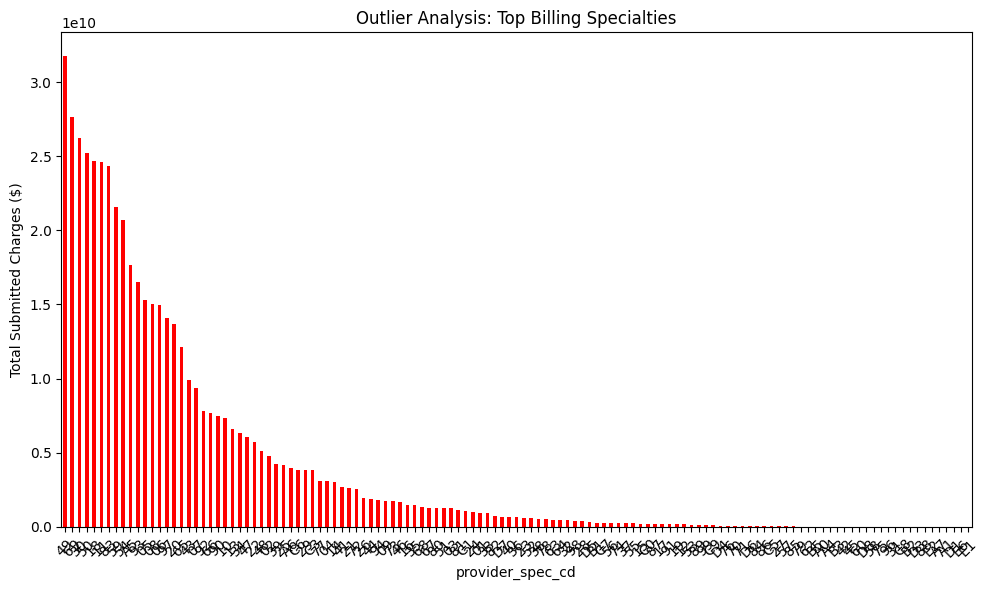

In [29]:
plt.figure(figsize=(10, 6))
outlier_summary.plot(kind='bar', color='red')
plt.title('Outlier Analysis: Top Billing Specialties')
plt.ylabel('Total Submitted Charges ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Top 10 specialties with highest billing
top_specialties = outliers.groupby('provider_spec_cd')['psps_submitted_charge_amt'].sum().nlargest(10)
print(top_specialties)

provider_spec_cd
49    3.176689e+10
69    2.765003e+10
30    2.624540e+10
50    2.522257e+10
18    2.467726e+10
11    2.463152e+10
83    2.436188e+10
59    2.158643e+10
54    2.068018e+10
A5    1.766468e+10
Name: psps_submitted_charge_amt, dtype: float64


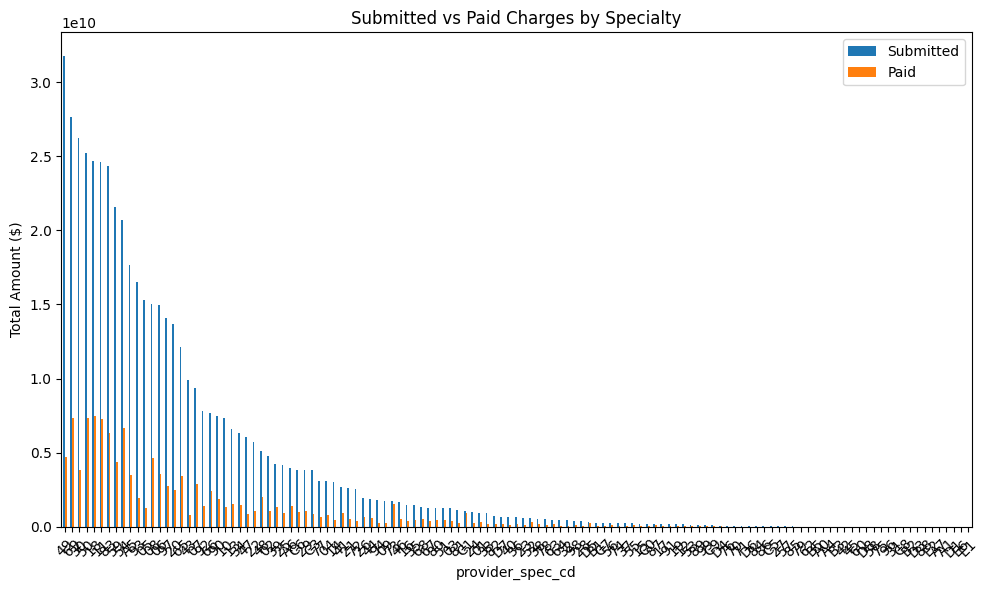

In [31]:
# Compare submitted and paid amounts by specialty
billing_comparison = outliers.groupby('provider_spec_cd').agg({
    'psps_submitted_charge_amt': 'sum',
    'psps_nch_payment_amt': 'sum'
}).sort_values('psps_submitted_charge_amt', ascending=False)

# Visualizing the difference
billing_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Submitted vs Paid Charges by Specialty')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.legend(['Submitted', 'Paid'])
plt.tight_layout()
plt.show()

In [33]:
print(data['psps_denied_services_cnt'].dtype)

object


In [34]:
data['psps_denied_services_cnt'] = pd.to_numeric(data['psps_denied_services_cnt'], errors='coerce')

In [35]:
data.dropna(subset=['psps_denied_services_cnt'], inplace=True)

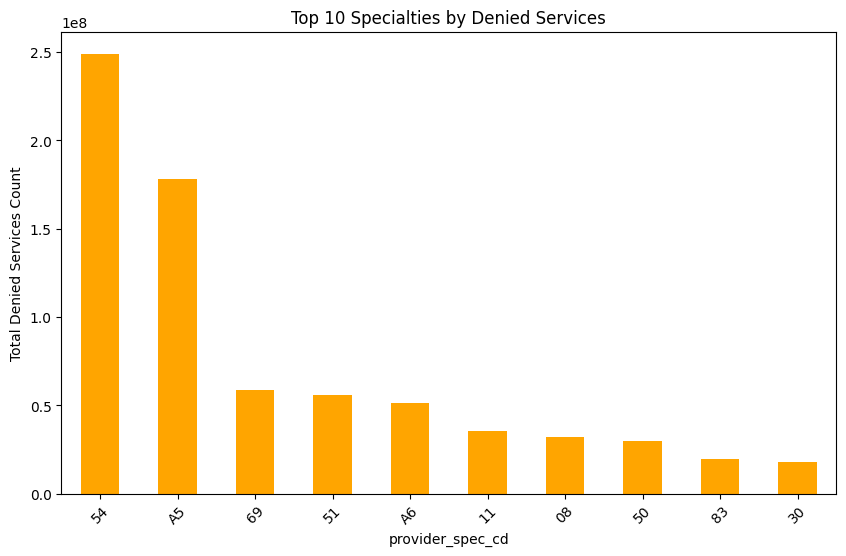

In [36]:
# Top specialties with the most denied services
denials_by_specialty = data.groupby('provider_spec_cd')['psps_denied_services_cnt'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
denials_by_specialty.plot(kind='bar', color='orange')
plt.title('Top 10 Specialties by Denied Services')
plt.ylabel('Total Denied Services Count')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Sample mapping of specialty codes to descriptions
specialty_map = {
    '54': 'Emergency Medicine',
    '45': 'Family Practice',
    '69': 'Psychiatry',
    '51': 'Surgical Assistant',
    'A6': 'Anesthesiology',
    '11': 'Internal Medicine',
    '08': 'Clinical Laboratory',
    '50': 'Chiropractic',
    '83': 'Physical Therapy',
    '30': 'Cardiology'
}

# Map the specialty codes
data['specialty_desc'] = data['provider_spec_cd'].map(specialty_map)

# Display specialty details for top denials
denials_by_specialty_desc = data.groupby('specialty_desc')['psps_denied_services_cnt'].sum().nlargest(10)
print(denials_by_specialty_desc)

specialty_desc
Emergency Medicine     249126245.0
Psychiatry              58683766.1
Surgical Assistant      56047074.0
Anesthesiology          51335205.0
Internal Medicine       35651339.6
Clinical Laboratory     32370153.8
Chiropractic            29887707.3
Physical Therapy        19722696.5
Cardiology              17807680.7
Family Practice            13586.0
Name: psps_denied_services_cnt, dtype: float64


In [38]:
billing_comparison = data.groupby('provider_spec_cd').agg({
    'psps_submitted_charge_amt': 'sum',
    'psps_nch_payment_amt': 'sum',
    'psps_denied_services_cnt': 'sum'
}).sort_values('psps_denied_services_cnt', ascending=False)

print(billing_comparison.head(10))

                  psps_submitted_charge_amt  psps_nch_payment_amt  \
provider_spec_cd                                                    
54                             2.000553e+10          6.418065e+09   
A5                             1.624156e+10          3.051085e+09   
69                             2.746811e+10          7.267168e+09   
51                             1.189516e+09          4.368314e+08   
A6                             3.878073e+09          1.363556e+09   
11                             2.219881e+10          6.558547e+09   
08                             1.375264e+10          4.242797e+09   
50                             2.163345e+10          6.254318e+09   
83                             2.075893e+10          5.305410e+09   
30                             1.997946e+10          2.961148e+09   

                  psps_denied_services_cnt  
provider_spec_cd                            
54                             249126245.0  
A5                             17808

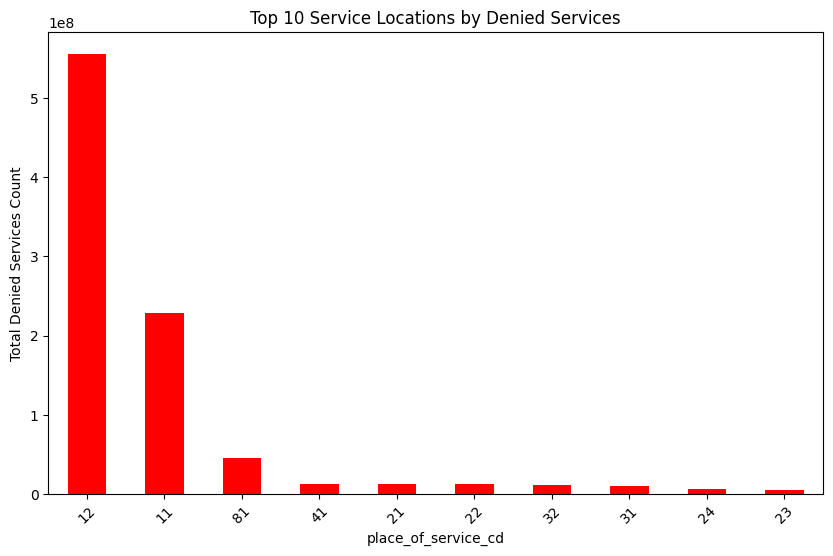

In [39]:
denials_by_location = data.groupby('place_of_service_cd')['psps_denied_services_cnt'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
denials_by_location.plot(kind='bar', color='red')
plt.title('Top 10 Service Locations by Denied Services')
plt.ylabel('Total Denied Services Count')
plt.xticks(rotation=45)
plt.show()

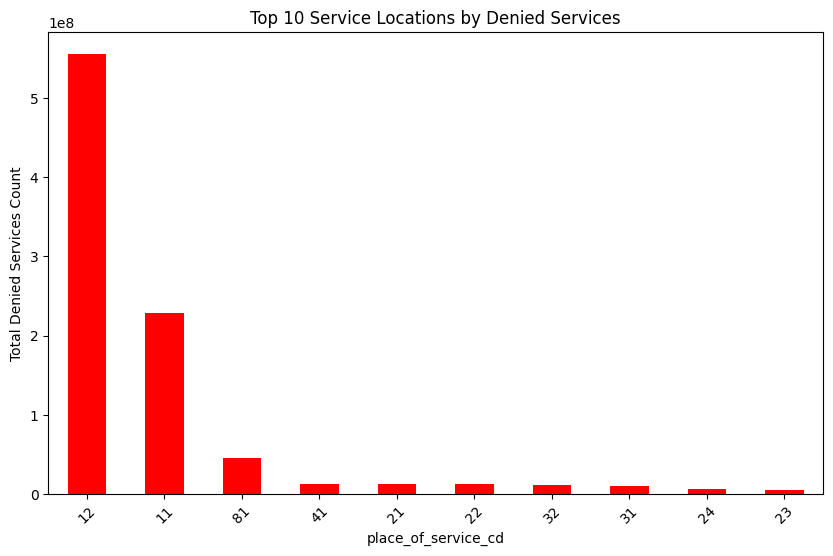

In [40]:
denials_by_location = data.groupby('place_of_service_cd')['psps_denied_services_cnt'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
denials_by_location.plot(kind='bar', color='red')
plt.title('Top 10 Service Locations by Denied Services')
plt.ylabel('Total Denied Services Count')
plt.xticks(rotation=45)
plt.show()

In [41]:
outlier_providers = data[(data['provider_spec_cd'].isin(['54', '45'])) &
                         (data['psps_denied_services_cnt'] > 10000)]

print(outlier_providers[['provider_spec_cd', 'psps_denied_services_cnt', 'psps_submitted_charge_amt']])

         provider_spec_cd  psps_denied_services_cnt  psps_submitted_charge_amt
1925                   54                   14969.0               2.908670e+06
15213                  54                   13945.0               1.238401e+05
24132                  54                   10394.0               3.346740e+07
32018                  54                   10134.0               8.052090e+05
59253                  54                 2567506.0               1.199564e+08
...                   ...                       ...                        ...
9692195                54                   10962.0               4.666710e+03
9794692                54                   31413.0               1.265340e+06
10585152               54                   16859.0               8.597153e+05
11076812               54                   10500.0               2.607160e+03
12102050               54                   17910.0               4.173970e+04

[1055 rows x 3 columns]


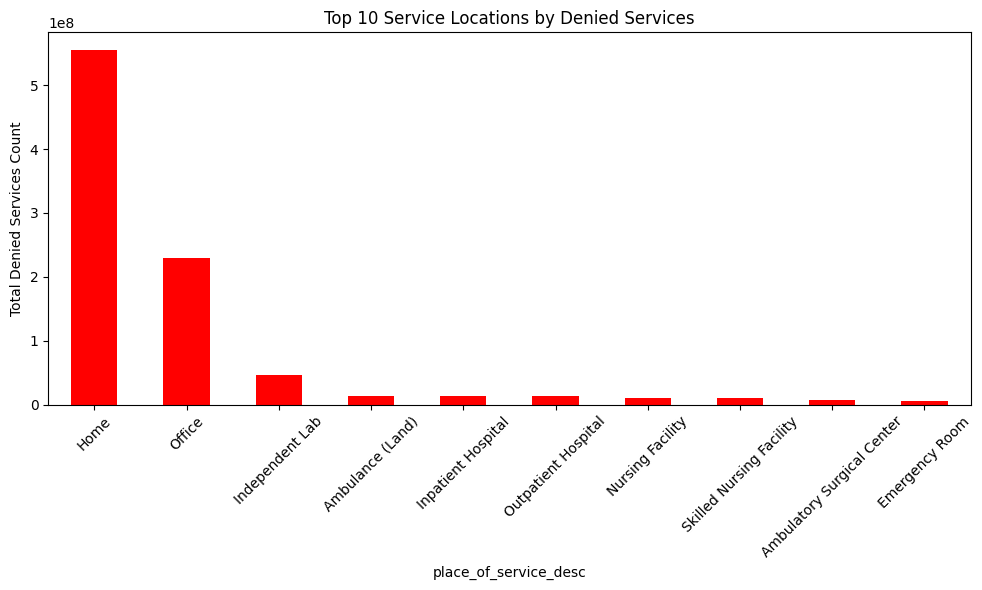

In [42]:
# Mapping place of service codes to descriptions
pos_map = {
    12: 'Home',
    11: 'Office',
    81: 'Independent Lab',
    41: 'Ambulance (Land)',
    21: 'Inpatient Hospital',
    22: 'Outpatient Hospital',
    32: 'Nursing Facility',
    31: 'Skilled Nursing Facility',
    24: 'Ambulatory Surgical Center',
    23: 'Emergency Room'
}

# Add a new column for descriptions
data['place_of_service_desc'] = data['place_of_service_cd'].map(pos_map)

# Plot with descriptive labels
denials_by_location = data.groupby('place_of_service_desc')['psps_denied_services_cnt'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
denials_by_location.plot(kind='bar', color='red')
plt.title('Top 10 Service Locations by Denied Services')
plt.ylabel('Total Denied Services Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Correlation between denied services and submitted charges
location_billing = data.groupby('place_of_service_desc').agg({
    'psps_submitted_charge_amt': 'sum',
    'psps_denied_services_cnt': 'sum'
}).sort_values('psps_denied_services_cnt', ascending=False)

print(location_billing)

                            psps_submitted_charge_amt  \
place_of_service_desc                                   
Home                                     4.729419e+10   
Office                                   1.790316e+11   
Independent Lab                          2.826406e+10   
Ambulance (Land)                         1.601656e+10   
Inpatient Hospital                       3.721714e+10   
Outpatient Hospital                      2.628113e+10   
Nursing Facility                         3.829223e+09   
Skilled Nursing Facility                 4.638017e+09   
Ambulatory Surgical Center               2.564687e+10   
Emergency Room                           2.199902e+10   

                            psps_denied_services_cnt  
place_of_service_desc                                 
Home                                     555169375.5  
Office                                   228911983.3  
Independent Lab                           45724649.7  
Ambulance (Land)                        

In [44]:
high_denial_providers = data[(data['place_of_service_desc'].isin(['Home', 'Office'])) &
                             (data['psps_denied_services_cnt'] > 10000)]

print(high_denial_providers[['provider_spec_cd', 'place_of_service_desc', 'psps_denied_services_cnt']].head(10))

     provider_spec_cd place_of_service_desc  psps_denied_services_cnt
24                 18                Office                   34702.0
66                 11                Office                   28870.0
186                11                Office                   16426.0
399                08                Office                   49350.0
581                25                Office                   33057.0
592                08                Office                   15239.0
607                30                Office                   17608.0
877                65                Office                   22936.0
967                06                Office                   16980.0
1248               A5                  Home                   23016.0


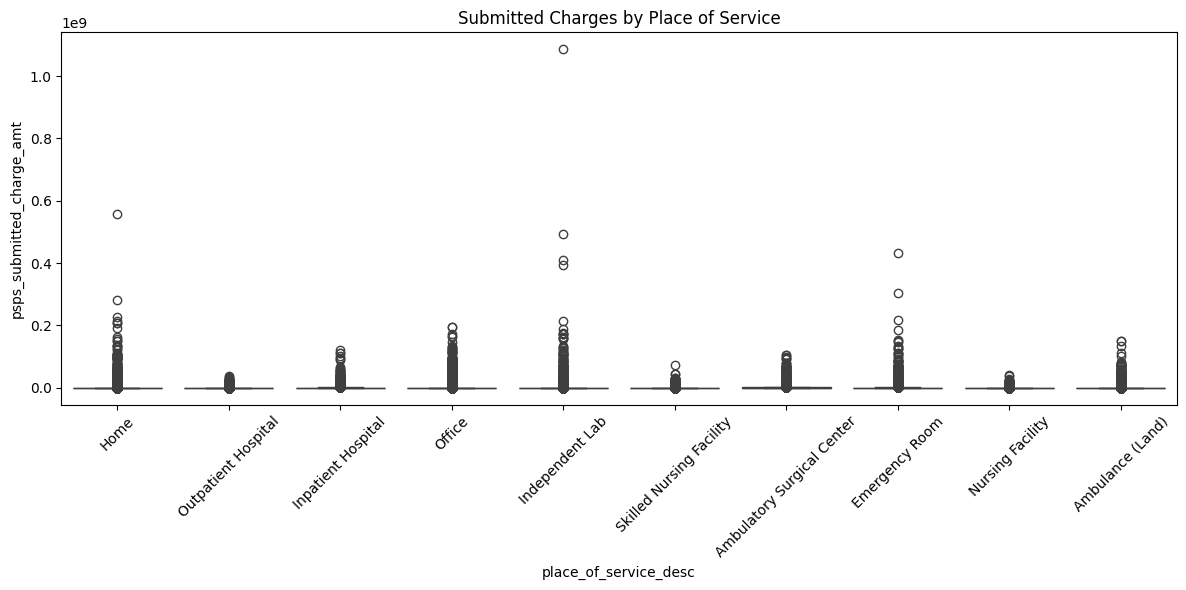

In [45]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='place_of_service_desc', y='psps_submitted_charge_amt', data=data)
plt.title('Submitted Charges by Place of Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
print(data.columns)

Index(['hcpcs_cd', 'provider_spec_cd', 'carrier_num', 'pricing_locality_cd',
       'type_of_service_cd', 'place_of_service_cd',
       'psps_submitted_service_cnt', 'psps_submitted_charge_amt',
       'psps_allowed_charge_amt', 'psps_denied_services_cnt',
       'psps_denied_charge_amt', 'psps_assigned_services_cnt',
       'psps_nch_payment_amt', 'psps_hcpcs_asc_ind_cd', 'psps_error_ind_cd',
       'hcpcs_betos_cd', 'specialty_desc', 'place_of_service_desc'],
      dtype='object')
